# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
### <p style="text-align: center;"> <b> Question 2: Which makes Taylor Swift's songs become well-known and attract billions of people around the world</b></p>


---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question

Which makes Taylor Swift's songs become well-known and attract billions of people around the world

### 1.1 The purpose of the question

Nowadays, there are many artists that are very famous: 'Taylor Swift', 'Beyoncé', 'BTS',... Their songs are very catchy and so good that we can not help but wonder how the artist know that their songs have enough things that catch our ears. But not only aim at specific type of audience but we can see some artists, for ex, each songs of Taylor Swift has different styles but still all of them are very famous and attract wide range of audiences from all over the world. Because how famous and influent Taylor Swift is, our team decide to investigate about her songs and the following attributes to figure out which factors of her song that make her unique among other competitive singers

With this question, Our team hopes that some insights gain from analysing and plotting can help the researchers, artists, composers or anyone who love musics to have some ideas behind what make the artist famous.

### 1.2 How to solve the question

1. Top 5 best songs of Taylor Swift(highest streams)
2. How Taylor Swift's songs rank was in different platforms(Spotify, Deezer, Shazam, Apple)
3. Number of Taylor Swift's songs in playlists(Spotify, Apple, Deezer)
4. Is date matter when Taylor Swift choose to released song?
5. Is the collab artist contribute important factor in Taylor Swift songs
6. Is there any special music properties in Taylor's songs


## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**📊 Get data**

In [2]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

#### Generel view about Taylor Swift and her songs

<p style='text-align: center;font-weight: bold'><i>Taylor Swift's number of songs compare to other artists</i></p>

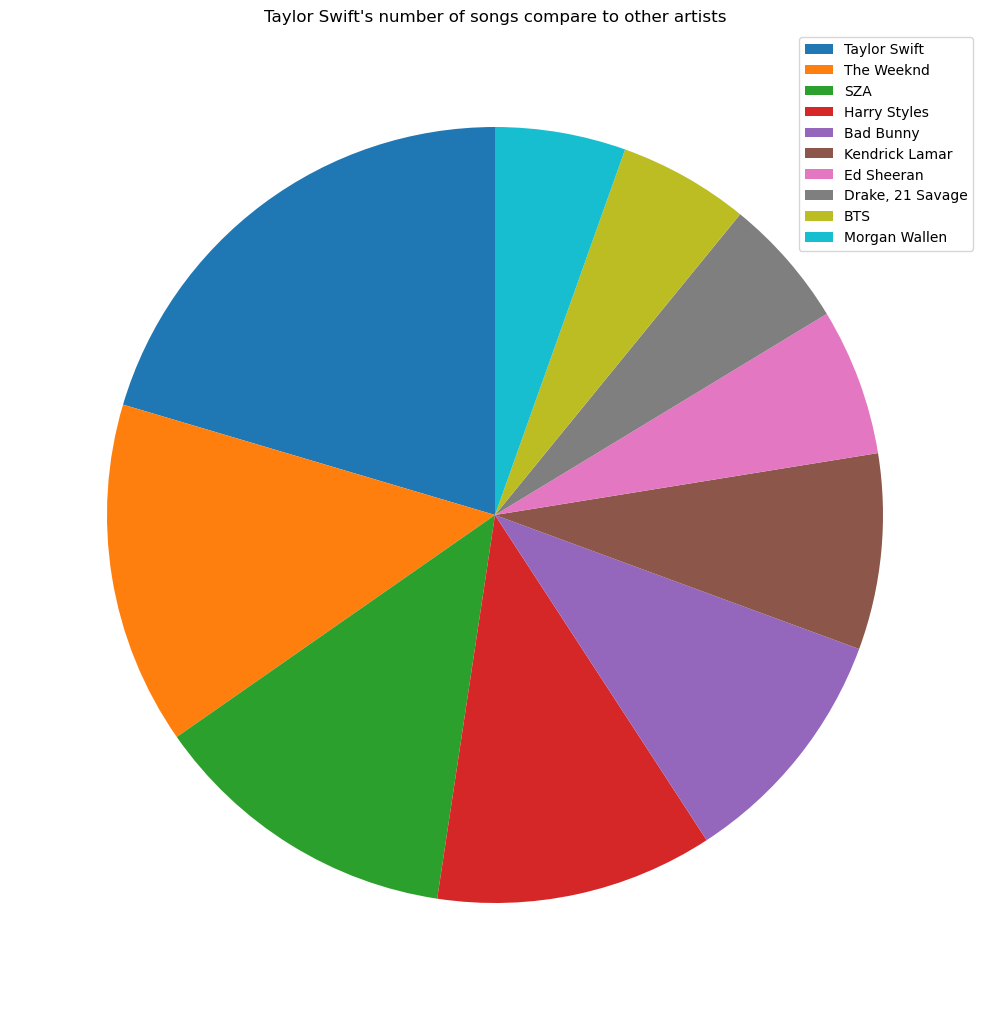

In [28]:
counts = df['artist(s)_name'].value_counts()[:10]
labels = counts.index
values = counts.values
# myexplode = [0.2, 0, 0, 0]
plt.figure(figsize=(10, 10))
patches, _ = plt.pie(values, startangle=90)
plt.legend(patches, labels)
plt.tight_layout()
plt.title('Taylor Swift\'s number of songs compare to other artists')
plt.show()


- 📝 Comment:
  - Number of songs that Taylor released are high compare to other artists.

<p style='text-align: center;font-weight: bold'><i>Taylor's songs and their corresponding streams</i></p>

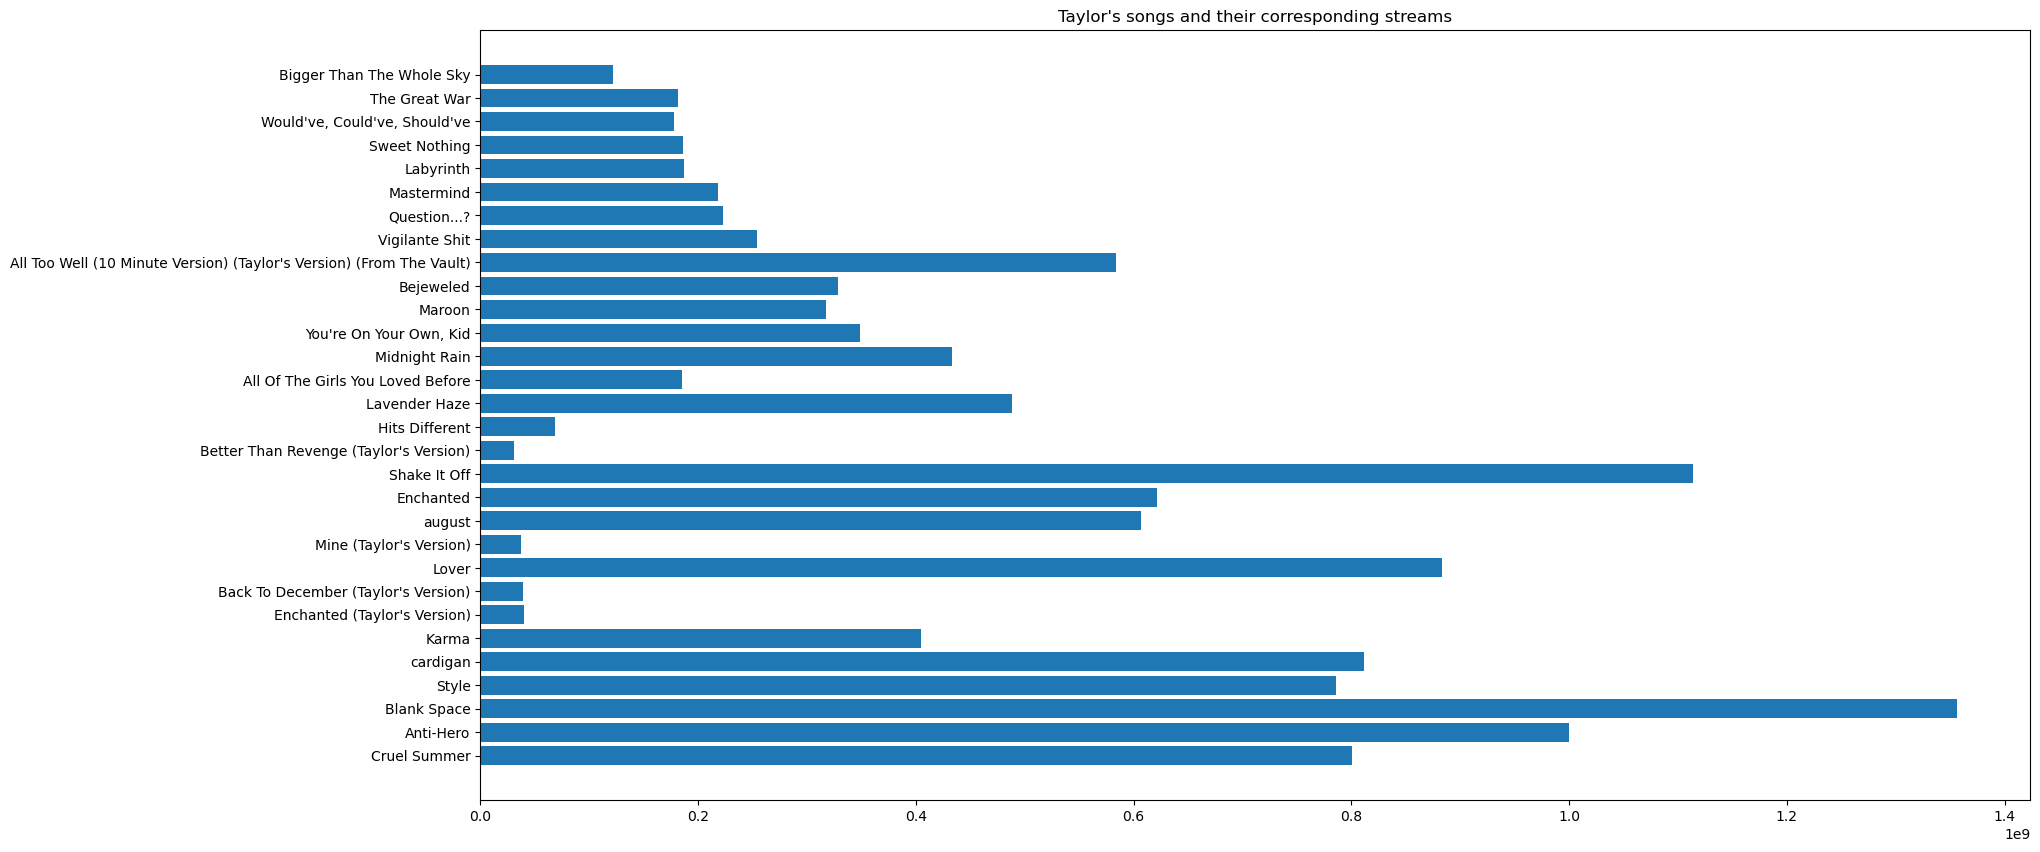

In [31]:
taylor_songs = df[df['artist(s)_name'] == 'Taylor Swift']
names = taylor_songs['track_name']
streams = taylor_songs['streams']

plt.figure(figsize=(20, 10))
plt.barh(names, streams)
plt.title('Taylor\'s songs and their corresponding streams')
plt.show()

- Taylor's highest-stream song and the highest-stream song from dataset

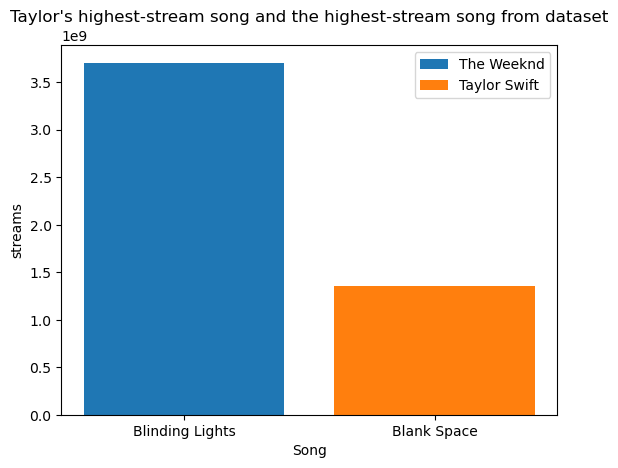

In [66]:
best_one = df.sort_values(by='streams', ascending=False).iloc[:1][['track_name', 'streams', 'artist(s)_name']]
best_taylor_one = taylor_songs.sort_values(by='streams', ascending=False).iloc[:1][['track_name', 'streams', 'artist(s)_name']]
best_one_df = pd.concat([best_one, best_taylor_one])

for index, row in best_one_df.iterrows():
  x = row['track_name']
  y = row['streams']
  plt.title('Taylor\'s highest-stream song and the highest-stream song from dataset')
  plt.ylabel('streams')
  plt.xlabel('Song')
  plt.bar(x, y, label=row['artist(s)_name'])

plt.legend()
plt.show();

- 📝 Comment:
  - We can see that some songs of Taylors have **very high streams**
  - `Blank Space` is the best one of Taylor that we have found so far. However, with the best one in the dataset, we see that `Blank Space's streams` is not significant. 
  

<p style='text-align: center;font-weight: bold'><i>Taylor's highest-stream song compare to the top 10 highest-stream songs in the dataset</i></p>

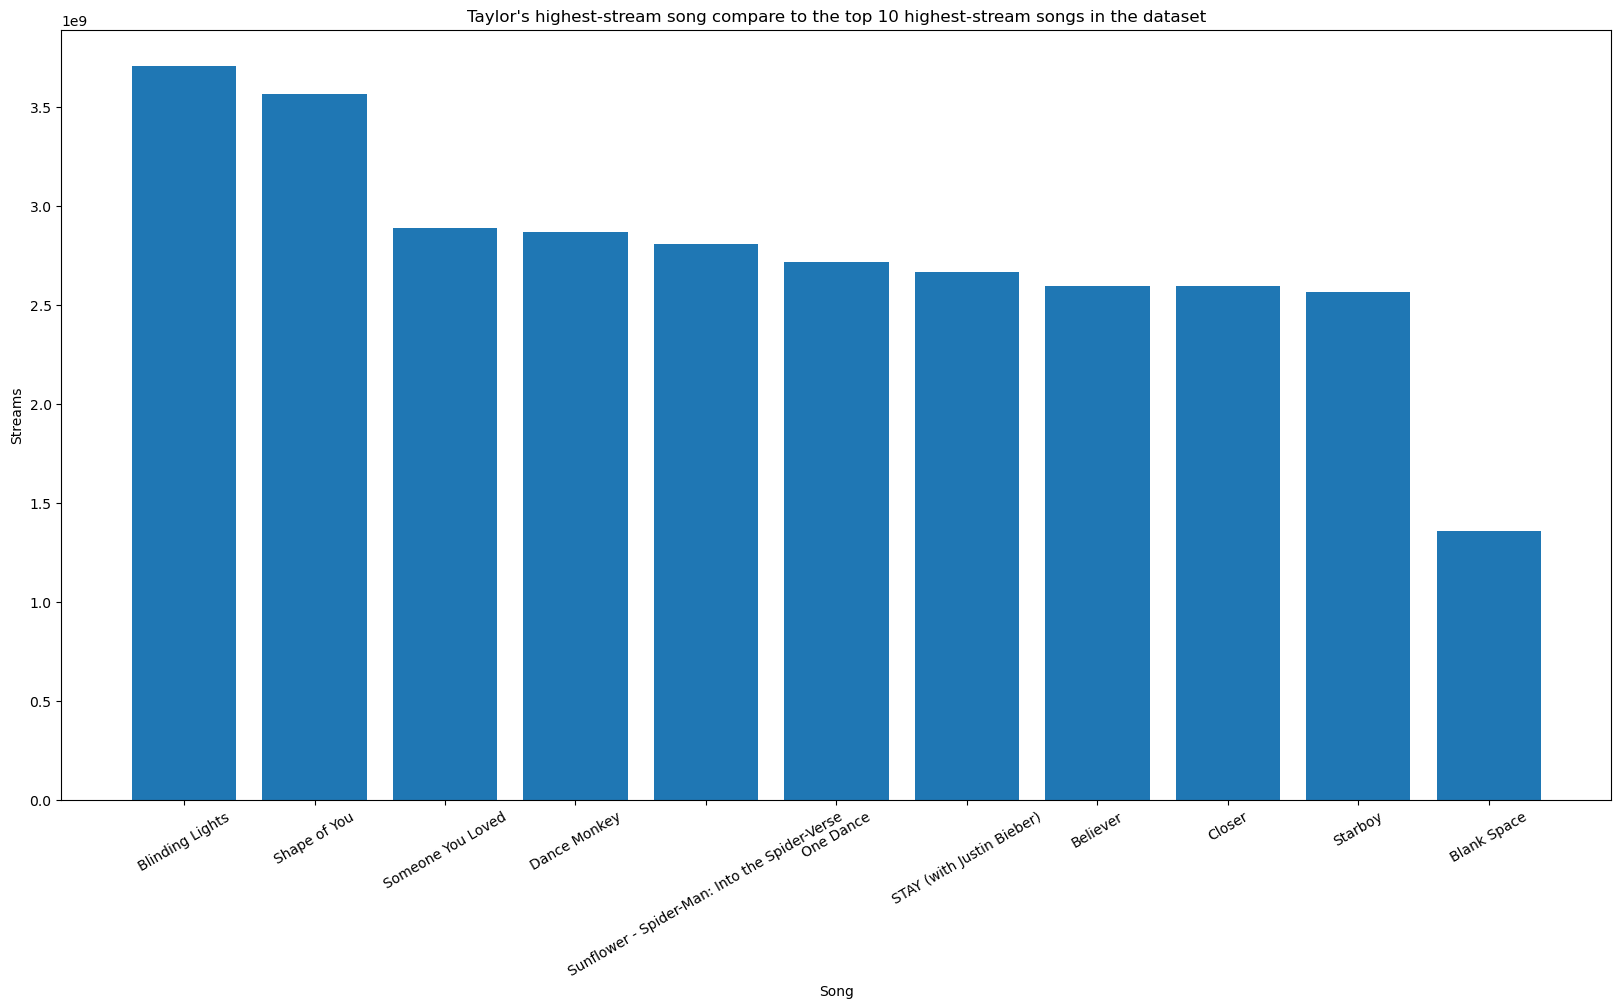

In [78]:
best_songs = df.sort_values(by='streams', ascending=False)

top_10_best_songs = pd.concat([best_songs[:10], best_taylor_one])

plt.figure(figsize=(20, 10))
plt.xticks(rotation=30)
plt.bar(top_10_best_songs['track_name'], top_10_best_songs['streams'])
plt.title('Taylor\'s highest-stream song compare to the top 10 highest-stream songs in the dataset')
plt.ylabel('Streams')
plt.xlabel('Song')
plt.show();

- 📝 Comment:
  - The best song of Taylor's `Blank Space` with top 10 highest-stream songs is also not significant.

<p style='text-align: center;font-weight: bold'><i>Taylor's average streams songs compare to other artists</i></p>

<p style='text-align: center;font-weight: bold'><i>Taylor's Songs released date</i></p>

<p style='text-align: center;font-weight: bold'><i>Taylor's Songs properties</i></p>

1. Pair of properties

2. Pair of properties and related streams

3. Properties distribution

<p style='text-align: center;font-weight: bold'><i>Taylor's songs in Spotify chart</i></p>

<p style='text-align: center;font-weight: bold'><i>Taylor's songs in Deezer chart</i></p>

<p style='text-align: center;font-weight: bold'><i>Taylor's songs in Shazam chart</i></p>

<p style='text-align: center;font-weight: bold'><i>Taylor's songs in Apple chart</i></p>

<p style='text-align: center;font-weight: bold'><i>
How Taylor's songs influence in playlists(Spotify, Deezer, Apple)?
</i></p>

<p style='text-align: center;font-weight: bold'>Taylor's songs with collab artists<i>

#### Determine which factors contribute the most in Taylor's songs

### 2.3 Answer the question